# Support Vector Machine

## 라이브러리 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

## 데이터 불러오기

In [37]:
iris = datasets.load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [38]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [39]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## 모델 학습하기

In [40]:
x = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel = 'rbf', C=1, gamma = 10).fit(x, y) #parameter

In [41]:
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
plot_unit = 0.025

In [42]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))

In [43]:
print(xx, yy)

(array([[3.3  , 3.325, 3.35 , ..., 8.825, 8.85 , 8.875],
       [3.3  , 3.325, 3.35 , ..., 8.825, 8.85 , 8.875],
       [3.3  , 3.325, 3.35 , ..., 8.825, 8.85 , 8.875],
       ...,
       [3.3  , 3.325, 3.35 , ..., 8.825, 8.85 , 8.875],
       [3.3  , 3.325, 3.35 , ..., 8.825, 8.85 , 8.875],
       [3.3  , 3.325, 3.35 , ..., 8.825, 8.85 , 8.875]]), array([[1.   , 1.   , 1.   , ..., 1.   , 1.   , 1.   ],
       [1.025, 1.025, 1.025, ..., 1.025, 1.025, 1.025],
       [1.05 , 1.05 , 1.05 , ..., 1.05 , 1.05 , 1.05 ],
       ...,
       [5.325, 5.325, 5.325, ..., 5.325, 5.325, 5.325],
       [5.35 , 5.35 , 5.35 , ..., 5.35 , 5.35 , 5.35 ],
       [5.375, 5.375, 5.375, ..., 5.375, 5.375, 5.375]]))


In [44]:
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

In [45]:
print(SVM.score(X=x, y=y))

0.84


## 데이터 시각화

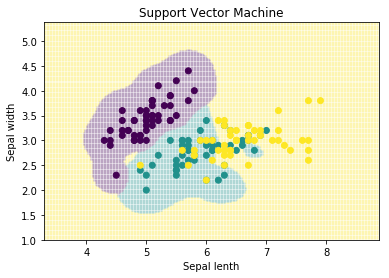

In [46]:
plt.pcolormesh(xx, yy, z, alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel('Sepal lenth')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()